### Assignment-Decision-Trees

When the new visitor visits the website, we get the information about source, medium, campaign, deviceCategory, operatingSystem, city, channelGrouping, pageviews, timeOnSite, bounce, etc. Based on these information here build model to predict if the new visitor will transact or not.

Programming langauge : Python
<br>
IDE : Jupyter
<br>
Dataset link : https://storage.googleapis.com/sample_user_behavior_data/sample_user_data.csv
<br>
dataset explanations : https://www.googlemerchandisestore.com/shop.axd/Home?utm_source=Partners&utm_medium=affiliate&utm_campaign=Data%20Share%20Promo

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pydotplus
from IPython.display import Image

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
data = pd.read_csv("sample_user_data.csv",low_memory=False)

In [3]:
data.head(5)

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,4948410136152642444,1,20170528,1496033409,NaN,5.0,951.0,NaN,NaN,(direct),(none),(not set),desktop,Linux,not available in demo dataset,Minato,Direct
1,2556838449093701419,1,20170528,1495991518,NaN,7.0,1214.0,NaN,NaN,google,organic,(not set),tablet,iOS,not available in demo dataset,not available in demo dataset,Organic Search
2,3820120288036087392,1,20170528,1495998052,NaN,21.0,619.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Warsaw,Organic Search
3,8405342198290114865,1,20170528,1495963334,NaN,4.0,145.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,8190050108423833846,1,20170528,1496029263,NaN,8.0,267.0,NaN,NaN,google,organic,(not set),mobile,Android,not available in demo dataset,not available in demo dataset,Organic Search


In [4]:
data.describe()

,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions
count,900544.000000,9.005440e+05,9.005440e+05,449146.0,900443.000000,450276.000000,1.143800e+04,11475.000000
mean,2.263943,2.016587e+07,1.484955e+09,1.0,3.846293,262.238061,1.544542e+08,1.048889
std,9.276698,4.697143e+03,9.127926e+06,0.0,7.018797,484.852324,7.222123e+08,0.456737
min,1.000000,2.016080e+07,1.491000e+03,1.0,1.000000,1.000000,1.200000e+06,1.000000
25%,1.000000,2.016103e+07,1.477544e+09,1.0,1.000000,32.000000,2.998250e+07,1.000000
50%,1.000000,2.017011e+07,1.483868e+09,1.0,1.000000,83.000000,5.577500e+07,1.000000
75%,1.000000,2.017042e+07,1.492697e+09,1.0,4.000000,258.000000,1.164875e+08,1.000000
max,395.000000,2.017073e+07,1.501571e+09,1.0,469.000000,19017.000000,4.708206e+10,25.000000


In [5]:
data.describe(include=['O'])

,fullVisitorId,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
count,900544,900543,900543,900543,900543,900543,900543,900543,900543
unique,711874,275,7,8,3,20,1,649,8
top,1957458976293878100,(direct),(none),(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
freq,276,369236,369234,872549,662342,348975,900543,506468,380110


In [6]:
data['VisitStartTime'] = pd.to_datetime(data['VisitStartTime'],unit='s')

In [7]:
data.head()

,fullVisitorId,VisitNumber,Date,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,mobileDeviceModel,city,ChannelGrouping
0,4948410136152642444,1,20170528,2017-05-29 04:50:09,NaN,5.0,951.0,NaN,NaN,(direct),(none),(not set),desktop,Linux,not available in demo dataset,Minato,Direct
1,2556838449093701419,1,20170528,2017-05-28 17:11:58,NaN,7.0,1214.0,NaN,NaN,google,organic,(not set),tablet,iOS,not available in demo dataset,not available in demo dataset,Organic Search
2,3820120288036087392,1,20170528,2017-05-28 19:00:52,NaN,21.0,619.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,Warsaw,Organic Search
3,8405342198290114865,1,20170528,2017-05-28 09:22:14,NaN,4.0,145.0,NaN,NaN,google,organic,(not set),desktop,Windows,not available in demo dataset,not available in demo dataset,Organic Search
4,8190050108423833846,1,20170528,2017-05-29 03:41:03,NaN,8.0,267.0,NaN,NaN,google,organic,(not set),mobile,Android,not available in demo dataset,not available in demo dataset,Organic Search


In [8]:
# extracting year, month, day, hour, minute from date
data['year'] = data['VisitStartTime'].dt.year
data['month'] = data['VisitStartTime'].dt.month
data['day'] = data['VisitStartTime'].dt.day
data['hour'] = data['VisitStartTime'].dt.hour
data['minute'] = data['VisitStartTime'].dt.minute

In [9]:
# if transactions = NaN,there will be no transaction; else transaction is made, so we replace NaN with 0
data['transactions'].replace(0, np.nan, inplace=True)

In [10]:
# if bounces = 1, then no transaction; else a transaction is made, so we replace NaN with 0
data['bounces'].fillna(0, inplace=True)

# if pageviews = NaN, there will be no transaction; else transaction is made, so we replace NaN with 0
data['pageviews'].fillna(0, inplace=True)

# if timeOnSite = NaN,there will be no transaction; else transaction is made, so we replace NaN with 0
data['timeOnSite'].fillna(0, inplace=True)

# if transactions = any value ,there will be transaction; write as 1
data['transactions'] = (data['transactions'].notnull()).astype('int')


In [11]:
data['transactions'].unique()

array([0, 1])

In [12]:
data.columns

Index(['fullVisitorId', 'VisitNumber', 'Date', 'VisitStartTime', 'bounces',
       'pageviews', 'timeOnSite', 'totalTransactionRevenue', 'transactions',
       'source', 'medium', 'campaign', 'deviceCategory', 'operatingSystem',
       'mobileDeviceModel', 'city', 'ChannelGrouping', 'year', 'month', 'day',
       'hour', 'minute'],
      dtype='object')

In [13]:
# visitorid, date and device model are not required
data = data.drop(['fullVisitorId', 'Date', 'mobileDeviceModel'], axis=1)

In [15]:
data.shape

(900544, 19)

In [16]:
data['city'].value_counts()

not available in demo dataset    506468
Mountain View                     40702
(not set)                         34182
New York                          26245
San Francisco                     20255
                                  ...  
Douglasville                          5
Deep River                            5
Daly City                             4
Bozeman                               3
Boise                                 3
Name: city, Length: 649, dtype: int64

In [17]:
# replacing "not available in demo dataset" and "(not set)" by "Unavailable"
data['city'].replace('not available in demo dataset', 'Unavailable', inplace=True)
data['city'].replace('(not set)', 'Unavailable', inplace=True)

The columns 'totals_totalTransactionRevenue' and 'totals_transactions' are dependent on each other. If 'totals_transactions' is NULL, then 'totals_totalTransactionRevenue' should have NULL as well, and vice-versa

In [18]:
%%time

# Transaction_Amt and Transactions_Total 
for i in range(0, len(data), 1):
    if (pd.isna(data.iloc[i, 7])) and (pd.notna(data.iloc[i, 8])):
        print('ERROR: totals_totalTransactionRevenue missing when totals_transactions not null at row ', i)

    if (pd.isna(data.iloc[i, 8])) and (pd.notna(data.iloc[i, 7])):
        print('ERROR: totals_transactions missing when totals_totalTransactionRevenue is not null at row ', i)

Wall time: 10.1 s


In [19]:
# no mismatched rows from the above cell, hence replace NaN with 0
data['totalTransactionRevenue'].fillna(0,inplace=True)
data['transactions'].fillna(0,inplace=True)

In [20]:
data.head()

,VisitNumber,VisitStartTime,bounces,pageviews,timeOnSite,totalTransactionRevenue,transactions,source,medium,campaign,deviceCategory,operatingSystem,city,ChannelGrouping,year,month,day,hour,minute
0,1,2017-05-29 04:50:09,0.0,5.0,951.0,0.0,0,(direct),(none),(not set),desktop,Linux,Minato,Direct,2017,5,29,4,50
1,1,2017-05-28 17:11:58,0.0,7.0,1214.0,0.0,0,google,organic,(not set),tablet,iOS,Unavailable,Organic Search,2017,5,28,17,11
2,1,2017-05-28 19:00:52,0.0,21.0,619.0,0.0,0,google,organic,(not set),desktop,Windows,Warsaw,Organic Search,2017,5,28,19,0
3,1,2017-05-28 09:22:14,0.0,4.0,145.0,0.0,0,google,organic,(not set),desktop,Windows,Unavailable,Organic Search,2017,5,28,9,22
4,1,2017-05-29 03:41:03,0.0,8.0,267.0,0.0,0,google,organic,(not set),mobile,Android,Unavailable,Organic Search,2017,5,29,3,41


#### HeatMap : find the correlation between each variable and find out the mostaly and related variables.

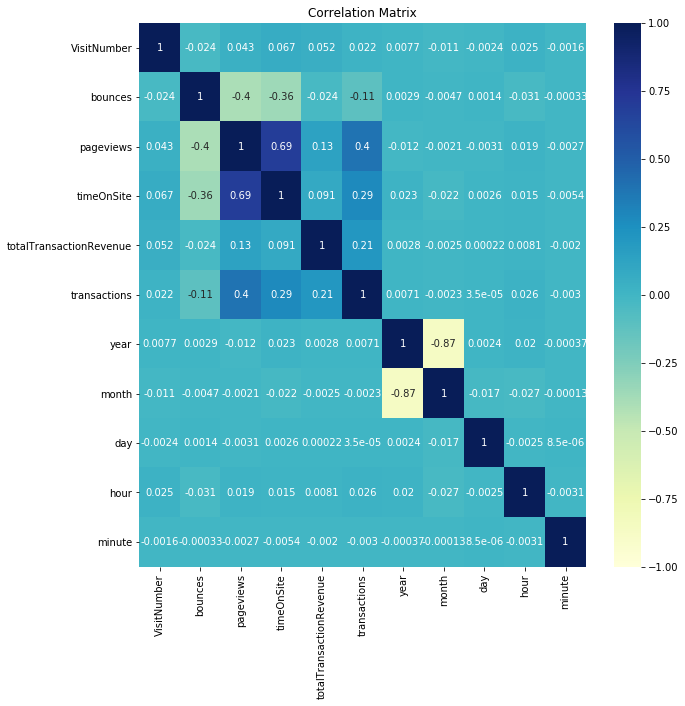

In [21]:
fig1 = plt.figure(figsize = (10,10));
plt.title('Correlation Matrix')
data.corr()
sns.heatmap(data.corr(), vmin = -1, vmax = 1, cmap = 'YlGnBu', annot=True);

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900544 entries, 0 to 900543
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   VisitNumber              900544 non-null  int64         
 1   VisitStartTime           900544 non-null  datetime64[ns]
 2   bounces                  900544 non-null  float64       
 3   pageviews                900544 non-null  float64       
 4   timeOnSite               900544 non-null  float64       
 5   totalTransactionRevenue  900544 non-null  float64       
 6   transactions             900544 non-null  int32         
 7   source                   900543 non-null  object        
 8   medium                   900543 non-null  object        
 9   campaign                 900543 non-null  object        
 10  deviceCategory           900543 non-null  object        
 11  operatingSystem          900543 non-null  object        
 12  city            

In [24]:
#To convert categorical variables to integer using label encoder

labEnc = LabelEncoder()

cols = ["ChannelGrouping", "city", "operatingSystem", 
        "campaign", "medium", "source"]

data[cols] = data[cols].astype(str)

col_lessLabels = ["deviceCategory"]

for col in cols:
    data[col] = labEnc.fit_transform(data[col])
    
data = pd.get_dummies(data, columns = col_lessLabels)

In [28]:
# Based on the data as we cleaned we split the data into input and output data 
# here we want transation output so make these in y varible related variables are in x

features = ['VisitNumber', 'bounces', 'pageviews', 'timeOnSite', 'source',
            'medium', 'campaign', 'operatingSystem', 'city',
            'ChannelGrouping', 'month', 'day', 'hour', 'deviceCategory_desktop', 'deviceCategory_mobile',
            'deviceCategory_tablet']

# Features
X = data[features] 

# Target variable
y = data.transactions

In [29]:
y.unique()

array([0, 1])

In [30]:
# Split the data into training set and testing set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [31]:
%%time

# Decision Tree classifer object
Dclf = DecisionTreeClassifier()

# Training Decision Tree Classifer
Dclf = Dclf.fit(X_train,y_train)

Wall time: 2.15 s


In [32]:
%%time

#Predict for test dataset
y_pred = Dclf.predict(X_test)

Wall time: 31.9 ms


In [33]:
# checking the accuracy of the model

print("Accuracy is:", metrics.accuracy_score(y_test, y_pred))

Accuracy is: 0.981205825361309


###### Accuracy of the model 0.981205825361309

In [42]:
# generating confusion matrix
confusion_matrix(y_test, y_pred)

array([[175959,   1828],
       [  1557,    765]], dtype=int64)

In [43]:
print('Recall = ', (175959 / (175959 + 1828)))

Recall =  0.9897180333770186


###### Recall  of the model 0.9897180333770186

In [56]:
print('Precision = ', (175959 / (175959 + 1557)))

Precision =  0.9912289596430744


###### Precision  of the model 0.9912289596430744

### CONCLUSION



##### PREDICTION OF THE MODEL

True Positive = 175959 observations

True Negative = 765 observations

False Positives = 1557 observations

False Negatives = 1828 observations

Recall = HIGH, indicating the classes are correctly identified

Precision = HIGH, indicating the positive class is correctly identified


Now, after training, if we test the model on the test set (which has mostly visitors of the website more than 98 percent chance that that customer will transact),
<br>
even if the model predicts that all the 900545 data points have any customer will transact , the accuracy still gets up to a whopping 98%. This can be 
<br>
misleading especially in a field where the risk of False Negatives should be negligible 
So we considere the presion and recall value also.

In the model precision higher than recall, higher precision because now the classifier is more confident that the customer has to transact. Lower recall because now that the classifier’s threshold is set so high, there will be fewer customer classified as transact.
<br>
99 percentage of your results which are relevant,
<br>
98.97 percentage of total relevant results correctly classified.